# Imports and Setup

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Add the project root to system path to import src modules
sys.path.append(os.path.abspath('..'))

from src.data_loader import DataLoader

# Setup plotting style
sns.set_style("whitegrid")
%matplotlib inline

# Load Data

In [2]:
# Initialize loader and load data
loader = DataLoader('../data/raw/spam.csv')
df = loader.load_data()
df.head()

Data loaded successfully: 5572 rows


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Target Distribution (Spam vs Ham)

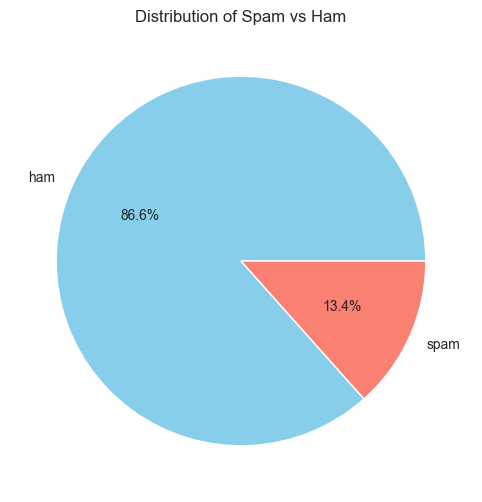

In [3]:
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribution of Spam vs Ham')
plt.ylabel('')
plt.show()

# Feature Engineering for Analysis

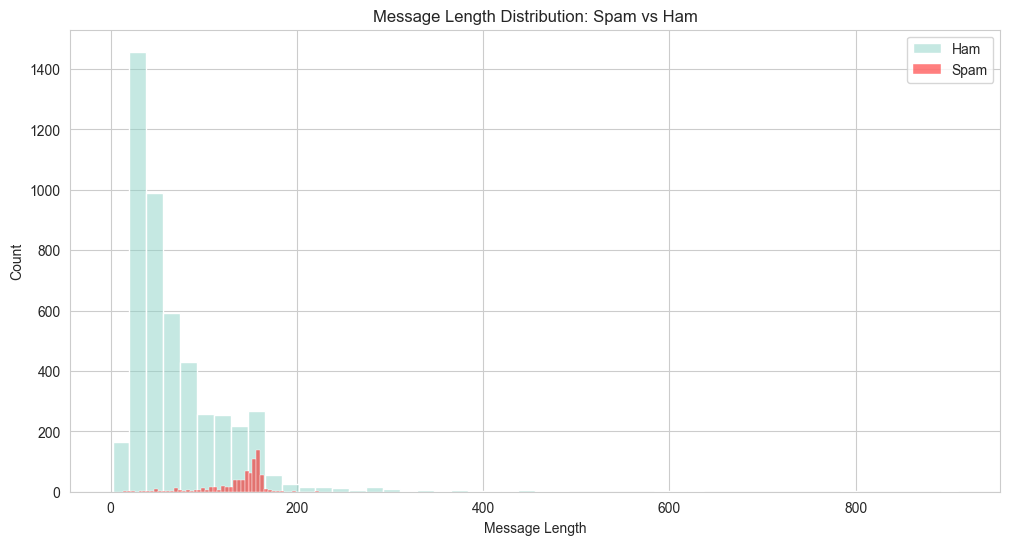

In [4]:
# Create temporary columns for analysis
df['message_len'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# specific visualization for length
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label']=='ham']['message_len'], bins=50, alpha=0.5, label='Ham')
sns.histplot(df[df['label']=='spam']['message_len'], bins=50, alpha=0.5, color='red', label='Spam')
plt.legend()
plt.title('Message Length Distribution: Spam vs Ham')
plt.xlabel('Message Length')
plt.show()

# Word Clouds

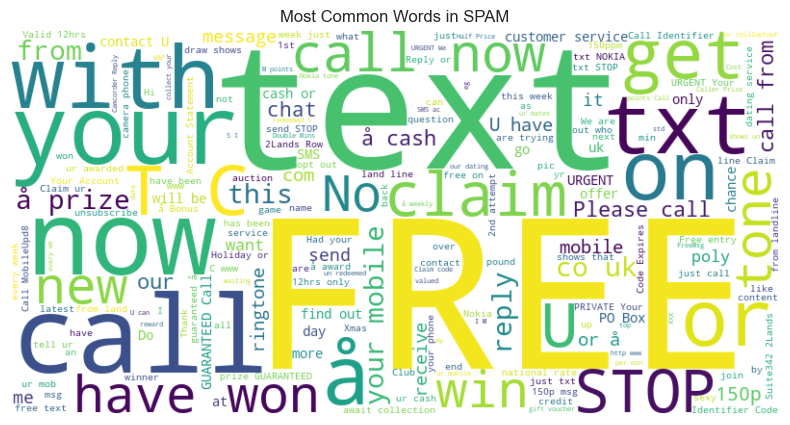

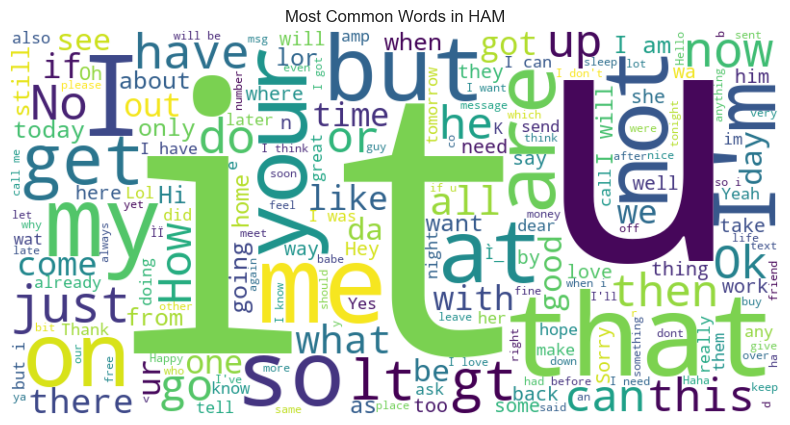

In [5]:
# Function to generate word cloud
def show_wordcloud(data, title):
    text = ' '.join(data['message'].astype(str).tolist())
    stopwords = set(['to', 'the', 'and', 'in', 'is', 'for', 'of', 'a', 'you']) # We will use NLTK later

    wc = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

show_wordcloud(df[df['label']=='spam'], 'Most Common Words in SPAM')
show_wordcloud(df[df['label']=='ham'], 'Most Common Words in HAM')